In [1]:
#Import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import neighbors, datasets

from sklearn.metrics import roc_curve


**Data Collection & Processing**

In [2]:
df_titanic = pd.read_csv("train.csv")

In [3]:
#Printing the first 10 rows of the dataset
df_titanic.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Checking the number of rows and columns
df_titanic.shape

#891 rows, 12 columns

(891, 12)

In [5]:
# to check some basic information of the data 
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#to check the number of missing values in each column
df_titanic.isnull().sum()

#177 missing for Age, 687 missing for Cabin, 2 missing for Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Values**

In [7]:
#Dropping Cabin because there is too many missing value for it. 
df_titanic = df_titanic.drop(columns='Cabin', axis=1)


In [8]:
# Under 'Age' column, we will replace the missing values with the mean value
#inplace = true is to overwrite the entire data.
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [9]:
#finding the mode of column 'embarked' to add the value in it
print (df_titanic['Embarked'].mode())

#S appeared most in the data. Thus we will add it in. 

0    S
Name: Embarked, dtype: object


In [10]:
print (df_titanic['Embarked'].mode()[0])

S


**Replacing the missing value in "Embarked" column with 'S'**

In [11]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [12]:
#checking if there are any missing values left in each column 
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Analysis**

In [13]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Finding out how many people survived & did not survive.
df_titanic['Survived'].value_counts()

#549 did not survive, 342 survived. 

0    549
1    342
Name: Survived, dtype: int64

In [15]:
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
sns.set()

<AxesSubplot: >

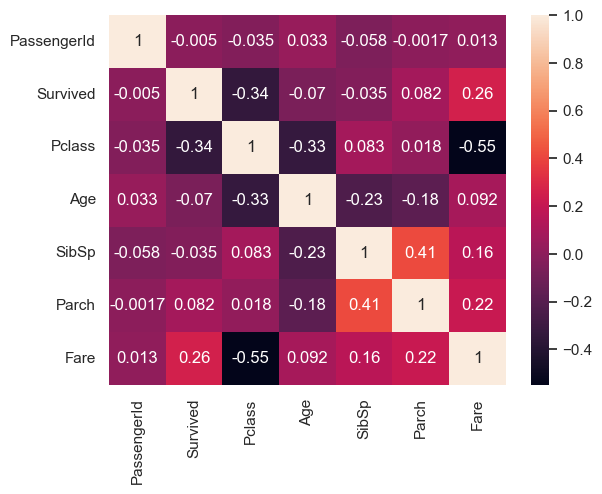

In [18]:
sns.heatmap(df_titanic.corr() , annot= True)

[Text(0, 0, '549'), Text(0, 0, '342')]

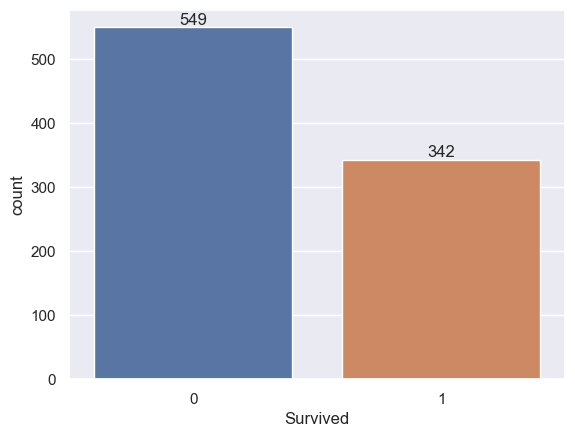

In [19]:
#Making a countplot to see the number of people who survived or did not survive
ax = sns.countplot(x ='Survived', data=df_titanic)
ax.bar_label(ax.containers[0], label_type='edge')
#

**Gender**

In [20]:
#Finding out how many males & females 
df_titanic['Sex'].value_counts()

#577 Male, 314 Female. 

male      577
female    314
Name: Sex, dtype: int64

[Text(0, 0, '577'), Text(0, 0, '314')]

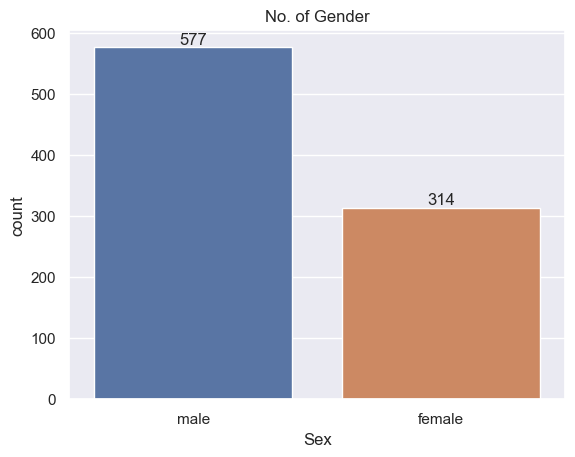

In [21]:
#Making a countplot for gender
plt.figure()
ax= sns.countplot(x = 'Sex', data=df_titanic)
plt.title('No. of Gender')

ax.bar_label(ax.containers[0], label_type='edge')



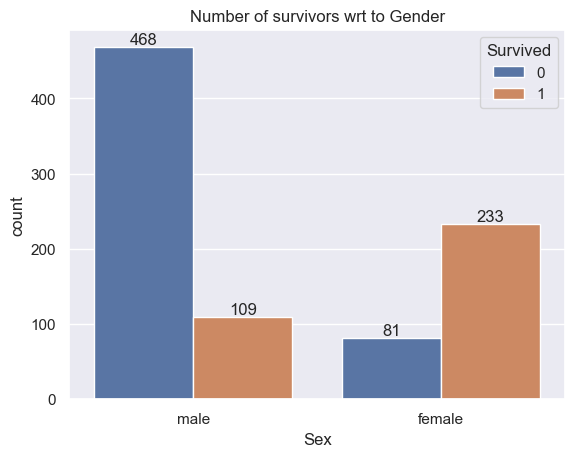

In [22]:
# number of survivors gender wise
ax = sns.countplot(x='Sex', hue='Survived', data=df_titanic)
plt.title('Number of survivors wrt to Gender')
for i in ax.containers:
    ax.bar_label(i,)

# number of females survived even though there are more males on the titanic


**Age**

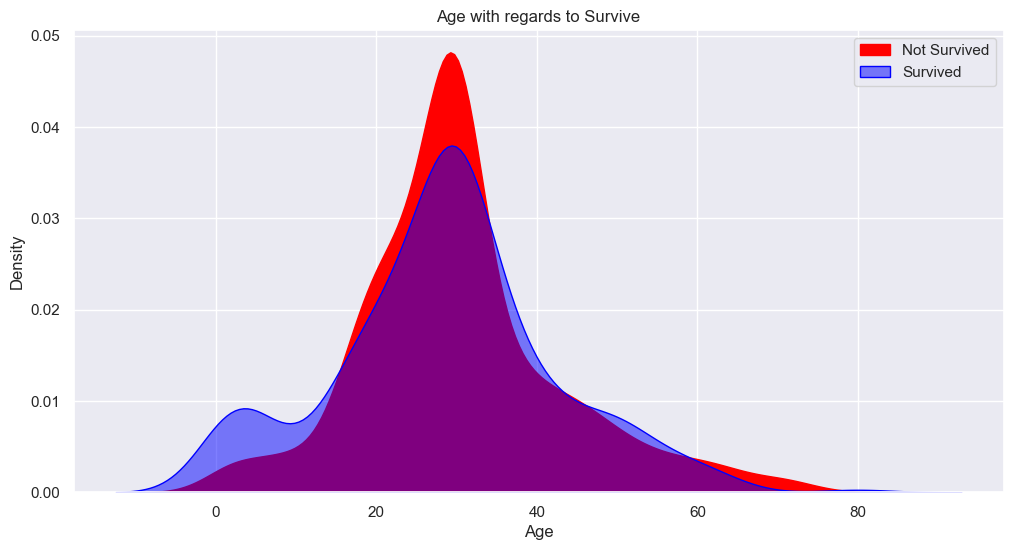

In [23]:
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=df_titanic[df_titanic['Survived']==0].dropna(),fill=True,alpha=1,color="red",label="Not Survived")
sns.kdeplot(x="Age",data=df_titanic[df_titanic['Survived']==1].dropna(),fill=True,alpha=0.5,color="blue",label="Survived")
plt.title('Age with regards to Survive')
plt.legend()
plt.show()

**Embarked**

[Text(0, 0, '646'), Text(0, 0, '168'), Text(0, 0, '77')]

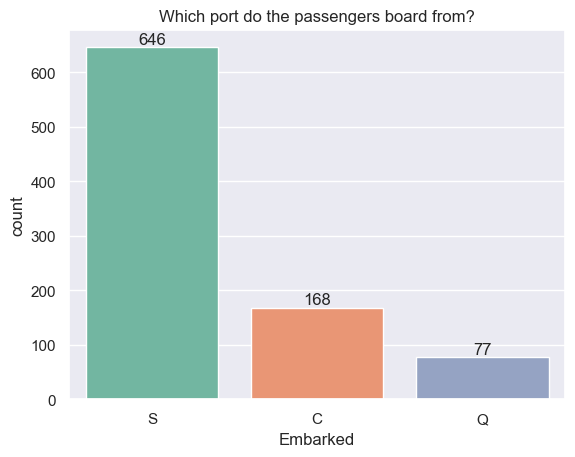

In [24]:
ax = sns.countplot(x = 'Embarked', data=df_titanic, palette='Set2')
plt.title('Which port do the passengers board from?')
ax.bar_label(ax.containers[0], label_type='edge')

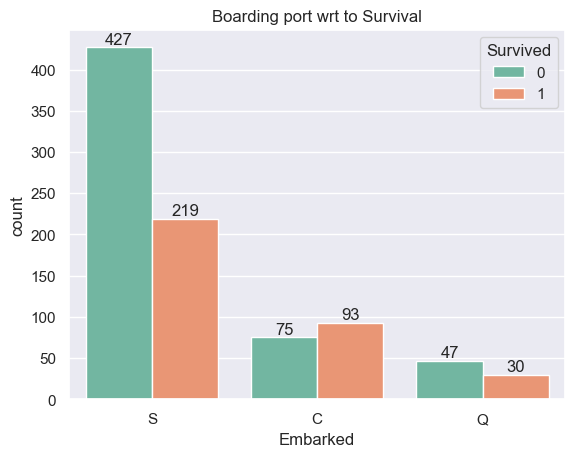

In [25]:
ax = sns.countplot(x = 'Embarked',hue='Survived', data=df_titanic, palette='Set2')
plt.title('Boarding port wrt to Survival')
for i in ax.containers:
    ax.bar_label(i,)

**Pclass**

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

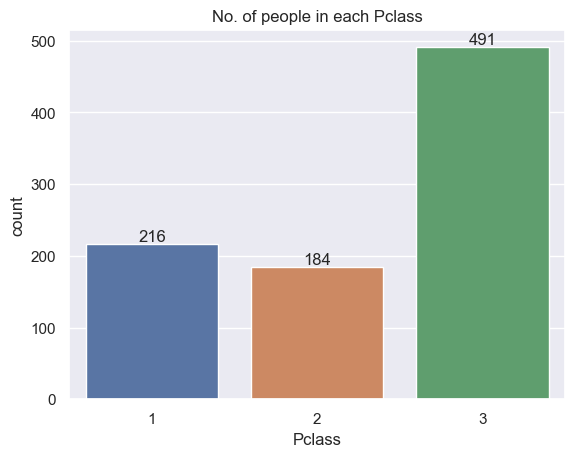

In [26]:
ax = sns.countplot(x = 'Pclass', data=df_titanic)
plt.title('No. of people in each Pclass')
ax.bar_label(ax.containers[0], label_type='edge')

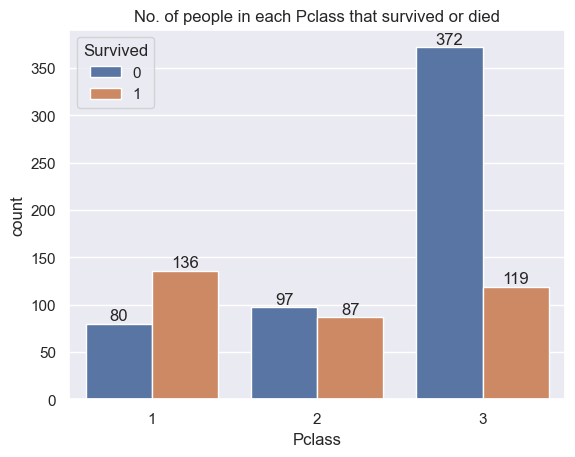

In [27]:
#To see which class has the most survivivors or most death
ax = sns.countplot(x='Pclass', hue='Survived', data=df_titanic)
plt.title('No. of people in each Pclass that survived or died')
for i in ax.containers:
    ax.bar_label(i,)

# The majority number of casualities came from Class 3, with 372 people who did not survive. Class 1 had the highest survivor , and if you bought a ticket at 1st class the percentage of you surviving is 37%
# if you were in class 3 , you had a 76% chance of not surviving. 


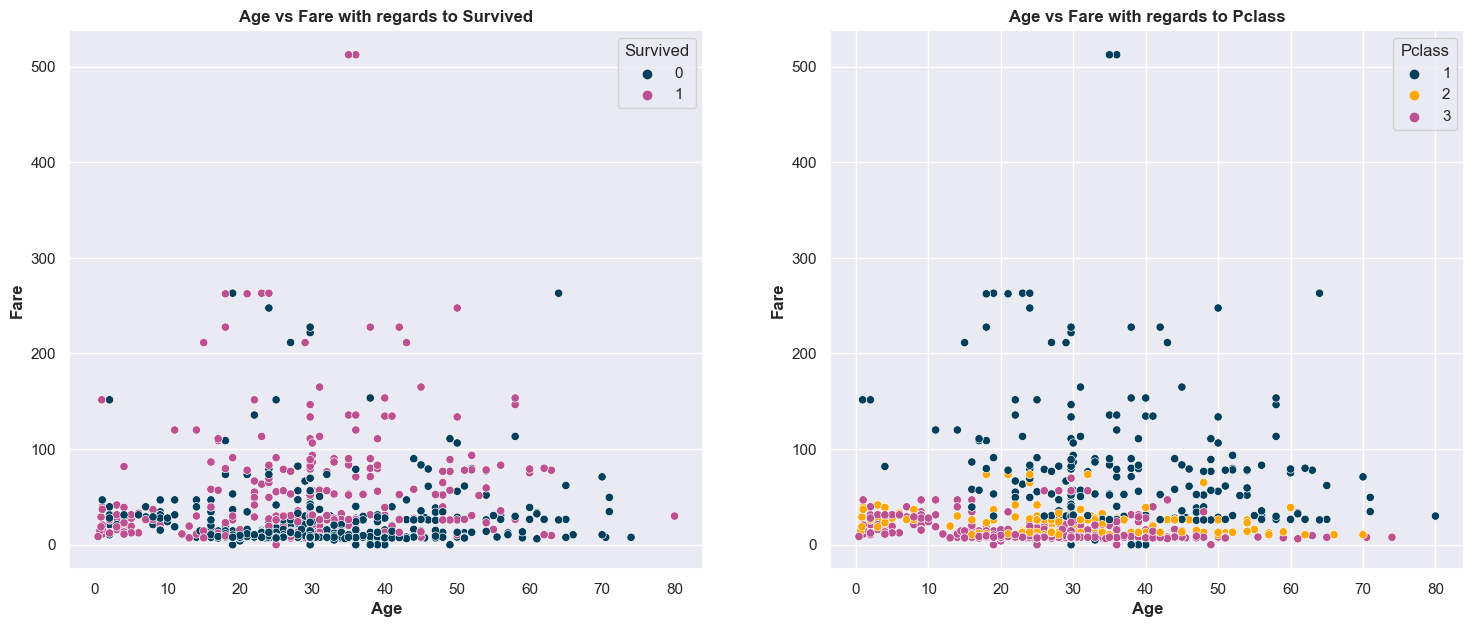

In [28]:
fig, axs = plt.subplots(1,2,figsize=(18, 7))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df_titanic, ax=axs[0], palette=["#003f5c", "#bc5090"])
axs[0].set_title("Age vs Fare with regards to Survived", fontweight="bold")
axs[0].set_xlabel("Age", fontweight="bold")
axs[0].set_ylabel("Fare", fontweight="bold")
axs[0].grid(axis="x")
l = axs[0].legend(title="Survived")

sns.scatterplot(x="Age", y="Fare", hue="Pclass", palette=["#003f5c", "#ffa600", "#bc5090"], data=df_titanic)
axs[1].set_title("Age vs Fare with regards to Pclass", fontweight="bold")
axs[1].set_xlabel("Age", fontweight="bold")
axs[1].set_ylabel("Fare", fontweight="bold")
l = axs[1].legend(title="Pclass")

#1st plot
#children and teenagers had survived. The fare could not affect these people (mean fare was 32).
#increasing age with increasing fare, we can see a difference that those who had low fare ticket, could not survived and vice versa.

#2nd plot
#The passenger class 1 people's ticket fare were high and had survived.
#there was a opposite situation with passenger class 3 and passenger class 2. 


In [29]:
print(f"The average age of passenger who survived: {df_titanic[df_titanic['Survived'] == 1]['Age'].mean()}")
print(f"The average age of passenger who did not survive: {df_titanic[df_titanic['Survived'] == 0]['Age'].mean()}")

The average age of passenger who survived: 28.54977812177503
The average age of passenger who did not survive: 30.415099646415896


In [32]:
for i in range(1, 4):
    percentage = df_titanic[(df_titanic["Pclass"] == i) & (df_titanic["Survived"] == 0)].shape[0] / df_titanic[df_titanic["Pclass"] == i].shape[0] * 100
    age_died = df_titanic[(df_titanic["Pclass"] == i) & df_titanic["Survived"] == 0]["Age"].mean()
    age_survived = df_titanic[(df_titanic["Pclass"] == i) & df_titanic["Survived"] == 1]["Age"].mean()
    fare_died = df_titanic[(df_titanic["Pclass"] == i) & df_titanic["Survived"] == 0]["Fare"].mean()
    fare_survived = df_titanic[(df_titanic["Pclass"] == i) & df_titanic["Survived"] == 1]["Fare"].mean()
    
    print(f"\33[5mPclass = {i}\033[0m")
    print(f"% died = {round(percentage, 3)}")
    print(f"The average age who can't survived = {round(age_died, 2)}")
    print(f"The average age who have survived = {round(age_survived, 2)}")
    print(f"The average fare who can't survived = {round(fare_died, 2)}")
    print(f"The average fare who have survived = {round(fare_survived, 2)}")
    if i != 3: print("\n-----------------------------------------------\n")

Pclass = 1
% died = 37.037
The average age who can't survived = 28.78
The average age who have survived = 34.78
The average fare who can't survived = 20.78
The average fare who have survived = 95.61

-----------------------------------------------

Pclass = 2
% died = 52.717
The average age who can't survived = 30.09
The average age who have survived = 26.08
The average fare who can't survived = 33.3
The average fare who have survived = 22.06

-----------------------------------------------

Pclass = 3
% died = 75.764
The average age who can't survived = 30.7
The average age who have survived = 23.23
The average fare who can't survived = 35.06
The average fare who have survived = 13.69


In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Encoding the categorical column**

In [ ]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#converting the categorical columns 
df_titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Separating the features and the target**

In [ ]:
X = df_titanic.drop(columns = ['PassengerId', 'Name','Ticket','Survived'],axis=1)
Y = df_titanic['Survived']

In [ ]:
print (X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print (Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Splitting the data into training & testing data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=123)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

**Logistic Regression()**

In [ ]:
model=LogisticRegression()

To train the logistic regression

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [ ]:
#Accuracy on the training data
X_train_prediction = model.predict(X_train)

In [ ]:
print (X_train_prediction)

[1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print ('The accuracy score of the train data is:', training_data_accuracy)


The accuracy score of the train data is: 0.7949438202247191


In [ ]:
#Accuracy on the test data
X_test_prediction = model.predict(X_test)

In [ ]:
print (X_test_prediction)

[1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0]


In [ ]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print ('The accuracy score of the test data is:' , testing_data_accuracy)

The accuracy score of the test data is: 0.8156424581005587


In [ ]:
#Training accuracy means that identical images are used both for training and testing, 
#while test accuracy represents that the trained model identifies independent images that were not used in training.

**Model evaluation - AUC**

In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(Y_test, model.predict(X_test))

print(area_under_curve)

0.8122807017543859


In [ ]:
model.predict_proba(X_test).shape

(179, 2)

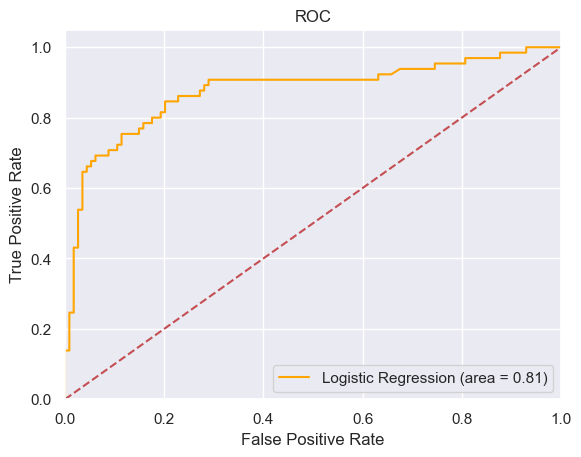

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, model.predict_proba(X_test)[:,1])  # second argument = positive class predictions
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % area_under_curve, color='orange')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Decision Tree Model**

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=123, max_depth=5)

clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

In [ ]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [ ]:
print (('The accuracy score of the test data is:'), accuracy_score(Y_test,y_pred_en))

The accuracy score of the test data is: 0.8491620111731844


In [ ]:
# AUC score

area_under_curve_tree = roc_auc_score(Y_test, clf_entropy.predict(X_test))

print(area_under_curve_tree)

0.8319838056680162


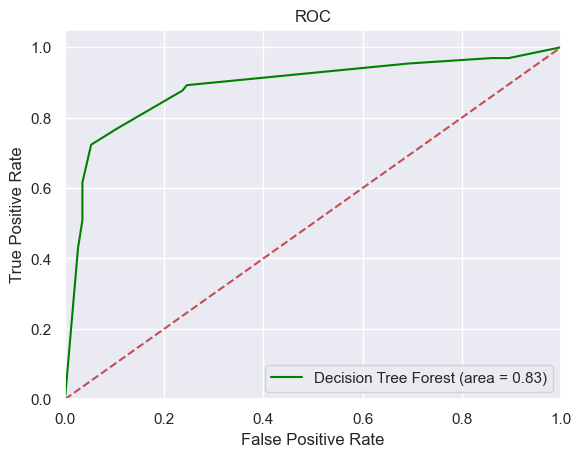

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, clf_entropy.predict_proba(X_test)[:,1])  # second argument = positive class predictions
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

plt.plot(fpr2, tpr2, label='Decision Tree Forest (area = %0.2f)' % area_under_curve_tree, color='green')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# performance of the model
print (('The accuracy score of the test data is:'), accuracy_score(Y_test,y_pred_en))
print ("Classification Report:")
print(classification_report(Y_test,y_pred_en))

The accuracy score of the test data is: 0.8491620111731844
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



## KNN

In [ ]:
# define the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# train the model
knn_classifier.fit(X_train, Y_train)
# some prediction time on our test set
y_pred_knn = knn_classifier.predict(X_test)
# performance of the model
print (('The accuracy score of the test data is:'), accuracy_score(Y_test,y_pred_knn))
print ("Classification Report:")
print(classification_report(Y_test, y_pred_knn))


The accuracy score of the test data is: 0.7318435754189944
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       114
           1       0.63      0.63      0.63        65

    accuracy                           0.73       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [ ]:
# AUC score

area_under_curve_knn = roc_auc_score(Y_test, knn_classifier.predict(X_test))

print(area_under_curve_knn)

0.7101214574898785


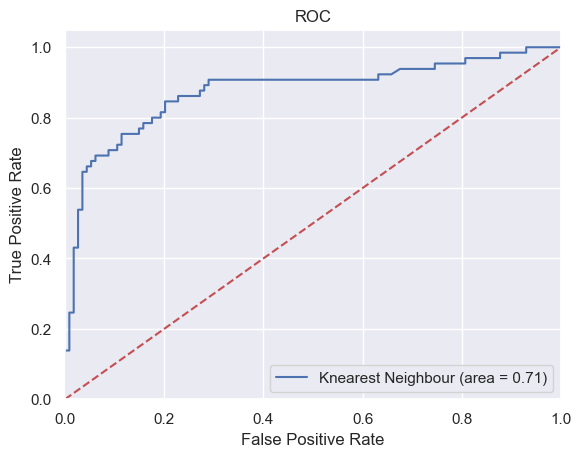

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, model.predict_proba(X_test)[:,1])  # second argument = positive class predictions
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

plt.plot(fpr3, tpr3, label='Knearest Neighbour (area = %0.2f)' % area_under_curve_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

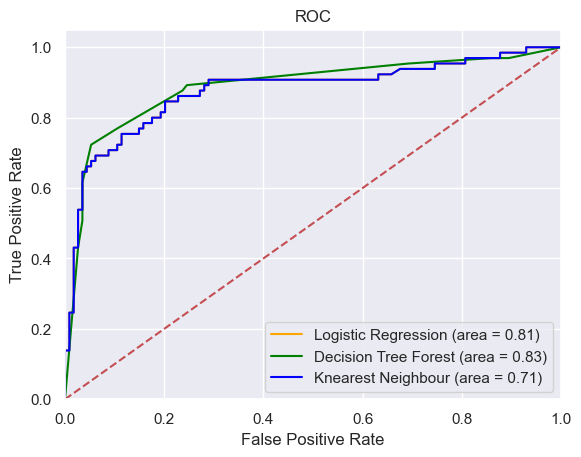

In [ ]:
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % area_under_curve, color='orange')
plt.plot(fpr2, tpr2, label='Decision Tree Forest (area = %0.2f)' % area_under_curve_tree, color='green')
plt.plot(fpr3, tpr3, label='Knearest Neighbour (area = %0.2f)' % area_under_curve_knn, color='blue')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()